In [51]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [52]:
X,y = make_blobs(n_samples=500, n_features=2,centers=2)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)


In [53]:
X_train.shape

(400, 2)

In [54]:
X_test.shape

(100, 2)

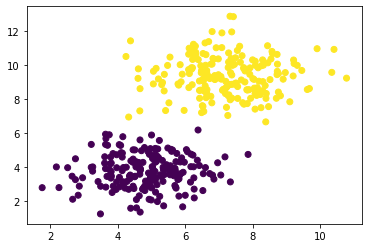

In [55]:
plt.scatter(X_train[:,0],X_train[:,1], c=y_train)

In [56]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=1)

In [57]:
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        51

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [58]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,y_train)

GaussianNB()

In [59]:
y_pred = nb.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        51

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



# implementation titanic dataset

In [60]:
import pandas as pd
df =  pd.read_csv('https://raw.githubusercontent.com/afifai/pelatihan_machinelearning/master/data/train.csv')

In [61]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

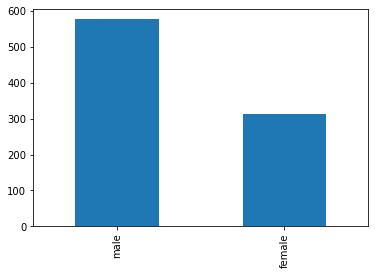

In [62]:
df.Sex.value_counts().plot(kind = 'bar')

In [63]:
df.drop(['Name','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [64]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [65]:
df.set_index('PassengerId',inplace=True)

In [67]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500


In [69]:
X =  df.drop('Survived',axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=5)


In [71]:
X_train.shape

(668, 6)

In [72]:
X_test.shape

(223, 6)

In [73]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [77]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [78]:
num_val = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
cat_val = ['Sex']
X_train_num = X_train[num_val]
X_train_cat = X_train[cat_val]
X_test_num = X_test[num_val]
X_test_cat = X_test[cat_val]

In [80]:
imputer = SimpleImputer(strategy='median')
imputer.fit(X_train_num)

SimpleImputer(strategy='median')

In [81]:
X_train_num_prep = imputer.transform(X_train_num)
X_test_num_prep = imputer.transform(X_test_num)

In [83]:
X_train_num.head()

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
98,1,23.0,0,1,63.3583
743,1,21.0,2,2,262.3750
755,2,48.0,1,2,65.0000
840,1,NaN,0,0,29.7000
185,3,4.0,0,2,22.0250


In [85]:
X_train_num_prep

array([[  1.    ,  23.    ,   0.    ,   1.    ,  63.3583],
       [  1.    ,  21.    ,   2.    ,   2.    , 262.375 ],
       [  2.    ,  48.    ,   1.    ,   2.    ,  65.    ],
       ...,
       [  1.    ,  35.    ,   0.    ,   0.    ,  26.2875],
       [  3.    ,  32.    ,   1.    ,   0.    ,  15.85  ],
       [  1.    ,  31.    ,   0.    ,   0.    ,  50.4958]])

In [86]:
scaler = StandardScaler()
scaler.fit(X_train_num_prep)

X_train_num_prep = scaler.transform(X_train_num_prep)
X_test_num_prep = scaler.transform(X_test_num_prep)

In [87]:
le = LabelEncoder()
le.fit(X_train_cat)

X_train_cat_prep = le.transform(X_train_cat)
X_test_cat_prep = le.transform(X_test_cat)

C:\Users\TIP-CRB-08\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [88]:
X_train_cat_prep

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,

In [90]:
import numpy as np
X_train_all = np.column_stack([X_train_num_prep, X_train_cat_prep])
X_test_all = np.column_stack([X_test_num_prep, X_test_cat_prep])

In [91]:
X_train_all

array([[-1.52822963, -0.49882232, -0.48457589,  0.7302894 ,  0.74017369,
         1.        ],
       [-1.52822963, -0.64919205,  1.3919267 ,  1.94079391,  5.40108063,
         0.        ],
       [-0.34668172,  1.38079932,  0.4536754 ,  1.94079391,  0.77862178,
         0.        ],
       ...,
       [-1.52822963,  0.40339607, -0.48457589, -0.48021511, -0.12801249,
         1.        ],
       [ 0.83486619,  0.17784147,  0.4536754 , -0.48021511, -0.37245537,
         1.        ],
       [-1.52822963,  0.10265661, -0.48457589, -0.48021511,  0.43893809,
         1.        ]])

In [93]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_all,y_train)
y_pred = model.predict(X_test_all)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       140
           1       0.81      0.75      0.77        83

    accuracy                           0.84       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.84      0.84      0.84       223



In [95]:
model = GaussianNB()
model.fit(X_train_all,y_train)
y_pred = model.predict(X_test_all)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       140
           1       0.82      0.72      0.77        83

    accuracy                           0.84       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.84      0.84      0.84       223



In [96]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_all,y_train)
y_pred = model.predict(X_test_all)
print(classification_report(y_test,y_pred))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [98]:
new_data = X_test.iloc[0]


In [99]:
X_test.iloc[0]

Pclass       3
Sex       male
Age        NaN
SibSp        0
Parch        0
Fare      7.75
Name: 127, dtype: object

In [100]:
new_data_num = new_data[num_val]
new_data_cat = new_data[cat_val]

In [104]:
new_data_num

array([[ 3.  , 28.  ,  0.  ,  0.  ,  7.75]])

In [105]:
#imputasi
new_data_num = imputer.transform(new_data_num)
#sdcale
new_data_num = scaler.transform(new_data_num)

In [106]:
#encode
new_data_cat = le.transform(new_data_cat)

In [107]:
new_data_all = np.column_stack([new_data_num,new_data_cat])

In [108]:
res = model.predict(new_data_all)

In [109]:
res

array([0.11370318])

In [110]:
y_test.iloc[0]

0